Initial Imports

In [19]:
import pandas as pd
import seaborn as sb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

Reading Data from CSV

In [2]:
df = pd.read_csv(r"../Dataset/Real estate.csv")
df.drop(['No'],axis=1,inplace=True)
df

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


Checking for null values in dataset (if True then removing them)

In [3]:
df.isnull().values.any()

False

Create a blank dataframe for storing results

In [4]:
result = pd.DataFrame(columns=["Model","Mean Absolute Error","Mean Squared Error"])

Plotting a pair-plot for analysis

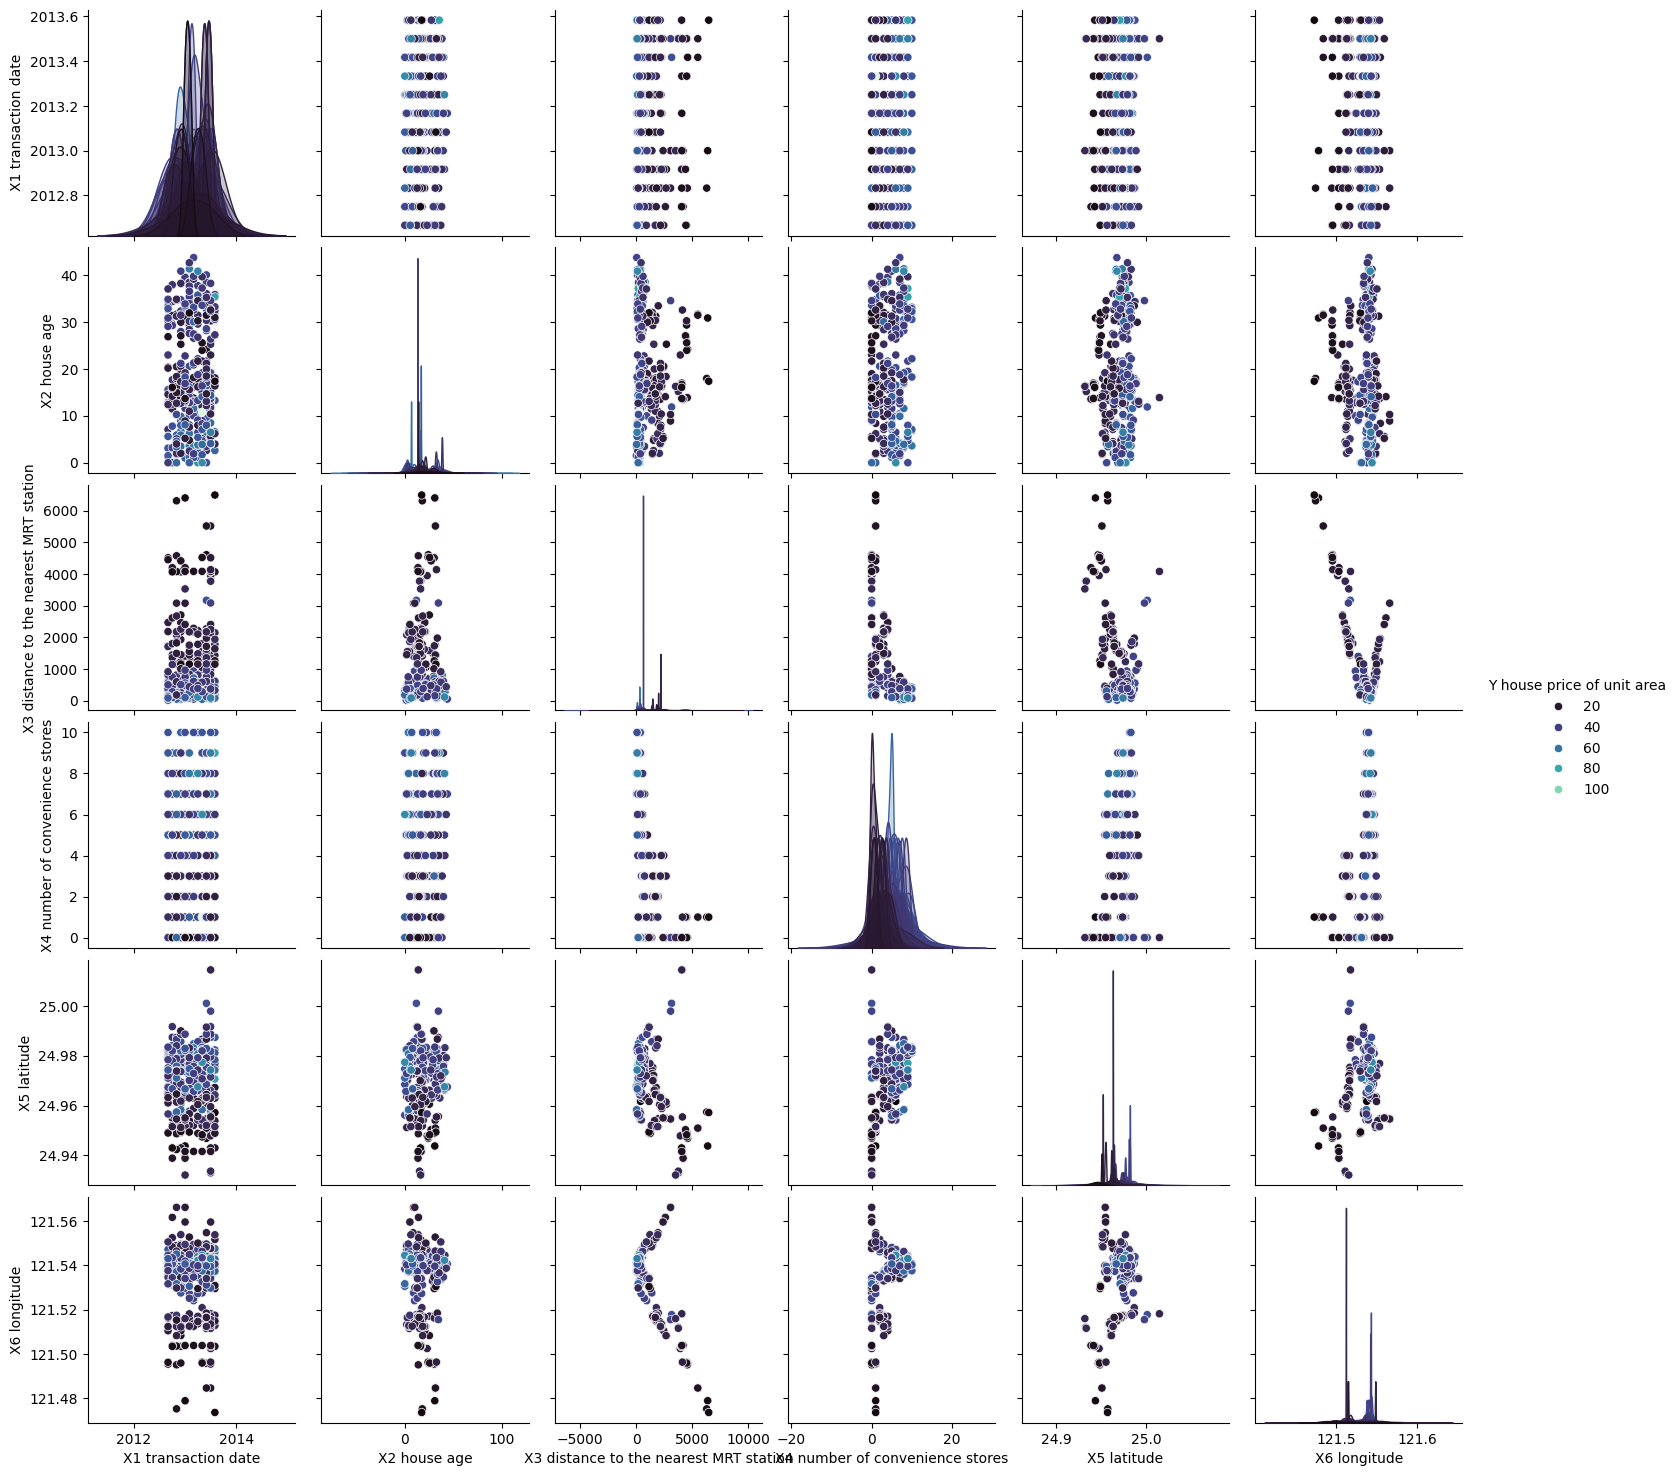

In [5]:
sb.pairplot(df,hue="Y house price of unit area",palette="mako")

Creating X and Y split as well as train-test split

In [6]:
y = np.array(df['Y house price of unit area'])
X = np.array(df.drop(['Y house price of unit area'],axis=1))

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Linear Regression Model

In [8]:
linearModel = LinearRegression()
linearModel.fit(X_train,y_train)

LinearRegression()

In [9]:
y_pred_linearModel = linearModel.predict(X_test)

Evaluating Linear Model

In [10]:
linearModel_MAE = mean_absolute_error(y_test,y_pred_linearModel)
linearModel_MSE = mean_squared_error(y_test,y_pred_linearModel)

In [11]:
result.loc[len(result)] = ["Linear Model",linearModel_MAE,linearModel_MSE]

### Regression Tree

In [13]:
regressionTreeModel = DecisionTreeRegressor()
regressionTreeModel.fit(X_train,y_train)

DecisionTreeRegressor()

In [14]:
y_pred_regressionTreeModel = regressionTreeModel.predict(X_test)

Evaluating Regression Tree Model

In [15]:
regressionTreeModel_MAE = mean_absolute_error(y_test,y_pred_regressionTreeModel)
regressionTreeModel_MSE = mean_squared_error(y_test,y_pred_regressionTreeModel)

In [16]:
result.loc[len(result)] = ["Regression Tree Model",regressionTreeModel_MAE,regressionTreeModel_MSE]

### Random Forest Regressor

In [20]:
randomForestRegressor = RandomForestRegressor()
randomForestRegressor.fit(X_train,y_train)

RandomForestRegressor()

In [21]:
y_pred_randomForestRegressor = randomForestRegressor.predict(X_test)

Evaluating regression tree model

In [22]:
randomForestRegressor_MAE = mean_absolute_error(y_test,y_pred_randomForestRegressor)
randomForestRegressor_MSE = mean_squared_error(y_test,y_pred_randomForestRegressor)

In [23]:
result.loc[len(result)] = ["Random Forest Regression Model",randomForestRegressor_MAE,randomForestRegressor_MSE]

### Final Results

In [24]:
result

,Model,Mean Absolute Error,Mean Squared Error
0,Linear Model,6.088876,71.485703
1,Regression Tree Model,6.262409,76.906588
2,Random Forest Regression Model,4.459544,42.769326
